In [1]:
import requests
import pandas as pd
import urllib.request
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
URL_16= "https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results"

In [3]:
response_16 = requests.post(URL_16)
response_16.status_code

200

In [4]:
response_16.headers["content-type"]

'text/html; charset=utf-8'

In [5]:
response_16.content

b'\n<!DOCTYPE html>\n<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<script src="/cdn-cgi/apps/head/u7S6kWy3Cysuih2qEtS0XdJlwiE.js"></script><link href="/styles/vendor.min.css" rel="stylesheet" />\n<link href="/styles/rnr.min.css" rel="stylesheet" />\n<meta charset="utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta http-equiv="Content-type" content="text/html; charset=utf-8">\n<meta content="width=device-width, initial-scale=1.0" name="viewport" />\n<title> | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>\n<meta property="og:title" content="" />\n<meta property="og:image" content="" />\n<meta property="og:description" content="" />\n<meta property="og:url" content="https://www.runrocknroll.com:443/en/Events/Nashville/The Races/Marathon/2016 Results" />\n\n<script>\r\n        (function (w, d, s, l, i) {\r\n            w[l] = w[l] || [];\r\n            w[l].push({\r\n

marathon_tables_16 = list()
x = 1
while x < 155:
    URL = "https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page={}".format(x)
    response = requests.post(URL_16)
    soup = BeautifulSoup(response.content, "html.parser")
    marathon_table = soup.find(attrs={"class": "race-search-main"}) \
    .find("table")
    marathon_tables_16.append(marathon_table)
    x += 1

In [6]:
m_2016 = []
x = 1
while x < 155:
  # baseURL = "https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results"
    URL ='https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page={}'.format(x)
    response = requests.post(URL)
    soup =BeautifulSoup(response.content, "html.parser")
    m_2016_page = soup.find(attrs = {"class": "race-search-main"}).find("table")
    m_2016_list = pd.read_html(str(m_2016_page))
    m_2016_list =  m_2016_list[0]
    m_2016.append(m_2016_list)
    x += 1

In [64]:
m_2016_df = pd.concat(m_2016)
m_2016_df

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43
2,3,1047,Christopher Capps,02:38:43
3,4,1052,Jason Grimes,02:45:06
4,5,1046,David Adams,02:47:28
...,...,...,...,...
12,99999,21159,Beth Lyons,00:00:00
13,99999,25061,Aleksei Stevens,00:00:00
14,99999,6047,Lizzie Ziccardi,00:00:00
15,99999,2052,Adam Pastors,00:00:00


In [8]:
m_2016_df.dtypes

Overall     int64
Bib         int64
Name       object
Time       object
dtype: object

In [9]:
m_2016_df_reset = m_2016_df.reset_index(drop=True)
m_2016_df_reset.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43
2,3,1047,Christopher Capps,02:38:43
3,4,1052,Jason Grimes,02:45:06
4,5,1046,David Adams,02:47:28


In [10]:
m_2016_df_reset['Time'] = pd.to_datetime(m_2016_df_reset['Time'])
m_2016_df_reset.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,2020-11-07 02:25:42
1,2,3,Brian Shelton,2020-11-07 02:34:43
2,3,1047,Christopher Capps,2020-11-07 02:38:43
3,4,1052,Jason Grimes,2020-11-07 02:45:06
4,5,1046,David Adams,2020-11-07 02:47:28


In [11]:
m_2016_df_reset.dtypes

Overall             int64
Bib                 int64
Name               object
Time       datetime64[ns]
dtype: object

In [12]:
##m_16_time_only = m_2016_df_reset['Time'] = pd.to_datetime(m_2016_df_reset['Time'], format='%H:%M:%S').dt.time
##m_16_time_only.head()

### Marathon 16 Mean Time

In [13]:
print(m_2016_df_reset['Time'].mean())

2020-11-07 03:43:09.756592640


### Marathon 16 Fastest Time

In [14]:
print(m_2016_df_reset['Time'].min())


2020-11-07 00:00:00


### Marathon 16 Slowest Time

In [15]:
print(m_2016_df_reset['Time'].max())

2020-11-07 07:00:00


In [ ]:
m_2016_df_reset['Time'].

In [60]:
times_999 = m_2016_df_reset.nsmallest(100, 'Time') 
times_999

,Overall,Bib,Name,Time
2952,99999,27326,Ashley Newton,2020-11-07
2953,99999,2031,Thomas Sirna,2020-11-07
2954,99999,4027,Sulaiman Seriki,2020-11-07
2955,99999,17252,Carol Mulderink,2020-11-07
2956,99999,27291,Mark Warf,2020-11-07
...,...,...,...,...
3048,99999,11015,Kevin West,2020-11-07
3049,99999,2108,Jamee Holmes,2020-11-07
3050,99999,27292,Regan Mcgril,2020-11-07
3051,99999,27311,William Fluharty,2020-11-07


In [66]:
did_not_finish_counts = m_2016_df_reset["Overall"].value_counts()
did_not_finish_counts

99999    890
2047       1
1050       1
1066       1
1064       1
        ... 
2536       1
487        1
2534       1
485        1
2049       1
Name: Overall, Length: 2953, dtype: int64

In [63]:
count_99999 = m_2016_df_reset[m_2016_df_reset.Overall.isin(['99999'])]
count_99999

,Overall,Bib,Name,Time
2952,99999,27326,Ashley Newton,2020-11-07
2953,99999,2031,Thomas Sirna,2020-11-07
2954,99999,4027,Sulaiman Seriki,2020-11-07
2955,99999,17252,Carol Mulderink,2020-11-07
2956,99999,27291,Mark Warf,2020-11-07
...,...,...,...,...
3837,99999,21159,Beth Lyons,2020-11-07
3838,99999,25061,Aleksei Stevens,2020-11-07
3839,99999,6047,Lizzie Ziccardi,2020-11-07
3840,99999,2052,Adam Pastors,2020-11-07


In [54]:
###sns.pairplot(m_2016_df_reset)
##plt.show()

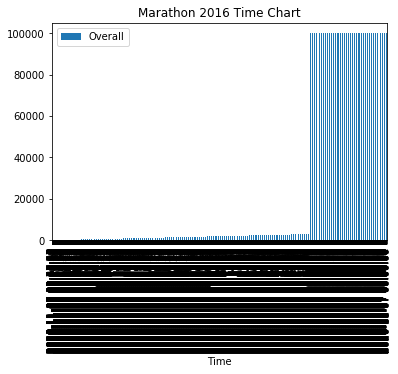

In [52]:
m_2016_df_reset.plot (x="Time",
            y="Overall",
            kind="bar")
plt.title('Marathon 2016 Time Chart')
plt
plt.show()

In [18]:
#marathon_16_df[1]

In [19]:
URL_17 = "https://www.runrocknroll.com/en/Events/Nashville/The-Races/Marathon/2017-Results"
URL_18 = "https://www.runrocknroll.com/en/Events/Nashville/The-Races/Marathon/2018-Results"
URL_19 = "https://www.runrocknroll.com/en/Events/Nashville/The-Races/Marathon/2019-Results"

In [20]:
response_17 = requests.post(URL_17)
response_17.status_code

response_18 = requests.post(URL_18)
response_18.status_code

response_19 = requests.post(URL_19)
response_19.status_code

200

In [21]:
marathon_tables_17 = list()
x = 1
while x < 148:
    URL = "https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page={}".format(x)
    response = requests.post(URL_17)
    soup = BeautifulSoup(response.content, "html.parser")
    marathon_table = soup.find(attrs={"class": "race-search-main"}) \
    .find("table")
    marathon_tables_17.append(marathon_table)
    x += 1
    
marathon_tables_18 = list()
x = 1
while x < 86:
    URL = "https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page={}".format(x)
    response = requests.post(URL_18)
    soup = BeautifulSoup(response.content, "html.parser")
    marathon_table = soup.find(attrs={"class": "race-search-main"}) \
    .find("table")
    marathon_tables_18.append(marathon_table)
    x += 1
    
marathon_tables_19 = list()
x = 1
while x < 114:
    URL = "https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page={}".format(x)
    response = requests.post(URL_19)
    soup = BeautifulSoup(response.content, "html.parser")
    marathon_table = soup.find(attrs={"class": "race-search-main"}) \
    .find("table")
    marathon_tables_19.append(marathon_table)
    x += 1
    
    

In [22]:
marathon_17_df = pd.read_html(str(marathon_tables_17))

In [23]:
marathon_17_df_merged = pd.concat(marathon_17_df)
marathon_17_df_merged.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28
2,3,1147,Daniel Everett,03:00:55
3,4,1029,Khris Vickroy,03:04:47
4,5,1119,Marcus Dilallo,03:04:53


In [24]:
marathon_17_df_merged_reset = marathon_17_df_merged.reset_index()

In [25]:
marathon_17_df_merged_reset['Time'] = pd.to_datetime(marathon_17_df_merged_reset['Time'], dayfirst = False)
marathon_17_df_merged_reset.head()

,index,Overall,Bib,Name,Time
0,0,1,1,Scott Wietecha,2020-11-07 02:40:25
1,1,2,1145,Ryan Regnier,2020-11-07 02:56:28
2,2,3,1147,Daniel Everett,2020-11-07 03:00:55
3,3,4,1029,Khris Vickroy,2020-11-07 03:04:47
4,4,5,1119,Marcus Dilallo,2020-11-07 03:04:53


In [26]:
marathon_18_df = pd.read_html(str(marathon_tables_18))

In [27]:
marathon_18_df_merged = pd.concat(marathon_18_df)
marathon_18_df_merged.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16
1,2,3,Garang Madut,02:29:52
2,3,33442,Kevin Fink,02:38:59
3,4,33441,Andrew Hodges,02:43:59
4,5,30028,Nicholas Aubert,02:48:11


In [28]:
marathon_18_df_merged_reset = marathon_18_df_merged.reset_index()

In [29]:
marathon_18_df_merged_reset['Time'] = pd.to_datetime(marathon_18_df_merged_reset['Time'], dayfirst = False)
marathon_18_df_merged_reset.head()

,index,Overall,Bib,Name,Time
0,0,1,1,Scott Wietecha,2020-11-07 02:28:16
1,1,2,3,Garang Madut,2020-11-07 02:29:52
2,2,3,33442,Kevin Fink,2020-11-07 02:38:59
3,3,4,33441,Andrew Hodges,2020-11-07 02:43:59
4,4,5,30028,Nicholas Aubert,2020-11-07 02:48:11


In [30]:
marathon_19_df = pd.read_html(str(marathon_tables_19))

In [31]:
marathon_19_df_merged = pd.concat(marathon_19_df)
marathon_19_df_merged.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09


In [32]:
marathon_19_df_merged_reset = marathon_19_df_merged.reset_index()

In [33]:
marathon_19_df_merged_reset['Time'] = pd.to_datetime(marathon_19_df_merged_reset['Time'], dayfirst = False)
marathon_19_df_merged_reset.head()

,index,Overall,Bib,Name,Time
0,0,1,30001,Travis Peruski,2020-11-07 01:37:54
1,1,2,1,Scott Wietecha,2020-11-07 02:34:59
2,2,3,4,Jordan Wilson,2020-11-07 02:35:24
3,3,4,30034,Steelton Flynn,2020-11-07 02:39:59
4,4,5,30035,Thomas Ellis,2020-11-07 02:42:09


In [34]:
#marathon_16_df[1]

In [35]:
#marathon_17_df[1]

In [36]:
#marathon_18_df[1]

In [37]:
#marathon_19_df[1]

In [38]:
#print(marathon_19_df[1].head())

In [39]:
marathon_19_df[1].dtypes

Overall     int64
Bib         int64
Name       object
Time       object
dtype: object